In [ ]:
#@title imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title biseccion con tolerancia y funcion auxiliar
def bisection(f, a, b, tol=10e-6):
  while (b-a)/2 > tol:
    c=(a+b)/2
    if f(c)==0:
      break
    if f(a)*f(c)<0:
      b=c
    else:
      a=c
  return (a+b)/2

#esta funcion parte de un initial guess y a partir del intervalo [ig, ig+1] va desplazandolo en 'step' hasta llegar a stop o encontrar un intervalo con alguna raiz
def interval_finder(initial_guess, step, stop, f):
  while initial_guess<stop:
    if f(initial_guess)*f(initial_guess+1)<0:
      return [initial_guess,initial_guess+1]
    else:
      initial_guess+=step
  return None



Tenemos la **Ecuación** $f(x,y)$:

$f(x,y)=x+y\cdot sin(log(y^{2}+1)-y)=1$

Necesitamos una **función** que nos sirva para hacer busqueda de raices, es decir, una **función** $g(x)$ que provenga de una **ecuación** $g(x)=0$ a la cual le queremos despejar $x$. En este caso la reacomodación más visible es:

$\hat f(x,y)=x+y\cdot sin(log(y^{2}+1)-y)-1=0$

Esta **ecuación** nos deja una **función** igualada a 0 pero que depende de dos parametros. Sin embargo, si revisamos el enunciado, se pivotea $x$ en $x̂$ (constante) por lo que la  **ecuación** queda:

$\hat f(x̂,y)=x̂+y\cdot sin(log(y^{2}+1)-y)-1=0$

 *(notar que ahora solo depende de y)*

 Redefiniremos la **ecuación** como:

 $g(y)=x̂+y\cdot sin(log(y^{2}+1)-y)-1=0$

 Ya tenemos una ec. del tipo $g(x)=0$, por lo que finalmente nos quedamos con la función $g(y)$ para aplicar la busqueda de raiz.


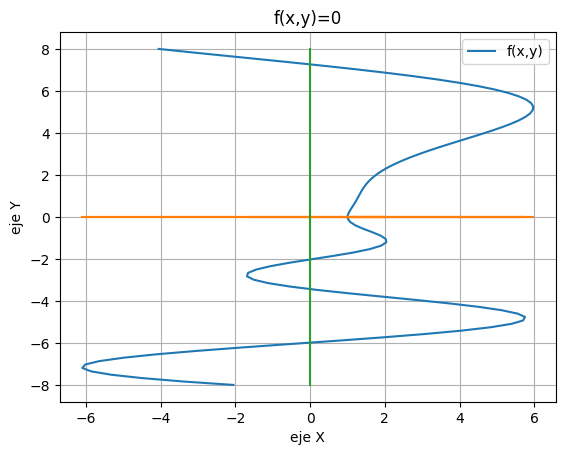

In [ ]:
#@title ecuacion f(x,y)
f_xy=lambda y: 1 - y*np.sin(np.log(np.power(y,2)+1)-y)

y=np.linspace(-8,8,100) #se generan muchos puntos para simular una linea continua
x=f_xy(y) #la funcion esta invertida por lo que obtenemos los puntos x a partir de y
plt.plot(x,y, label='f(x,y)')
plt.plot(x,[0]*len(x)) #una recta horizontal fijada en y=0
plt.plot([0]*len(y),y) #una recta vertical fijada en x=0
plt.title('f(x,y)=0')
plt.grid(True)
plt.ylabel('eje Y')
plt.xlabel('eje X')
plt.legend()
plt.show()

In [ ]:
#@title f_hat(y) y g(y) como funciones
f_hat= lambda x,y: x + y*np.sin(np.log(np.power(y,2)+1)-y)-1
g=lambda y: f_hat(2, y)

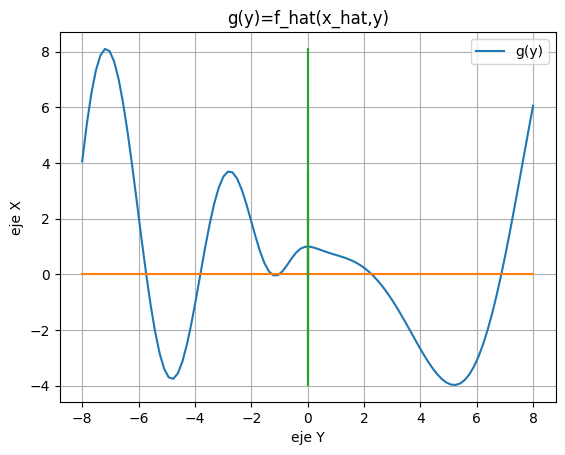

In [ ]:
#@title grafica funcion g(y) (se rotaron los ejes)
x=np.linspace(-8,8,100)
y=g(x)
plt.plot(x,y, label='g(y)')
plt.plot(x,[0]*len(x))
plt.plot([0]*len(x),y)
plt.title('g(y)=f_hat(x_hat,y)')
plt.grid(True)
plt.ylabel('eje X')
plt.xlabel('eje Y')
plt.legend()
plt.show()

In [ ]:
#@title busqueda de un intervalo con alguna raiz
a,b=interval_finder(initial_guess=-6, step=10e-3, stop=10, f=g)
print(f'intervalo unitario: [{a},{b}]')

intervalo unitario: [-6,-5]


In [ ]:
#@title para que me crean
print(f'g(a) = {g(a)} y g(b) = {g(b)}')

g(a) = 2.1104014827326 y g(b) = -3.5972539076021723


In [ ]:
#@title busqueda de raiz
r=bisection(g, a, b, tol=10e-6)
print(f'r = {r}')

r = -5.72845458984375


In [ ]:
#@title g(r) notar que no es exacto
g(r)

0.0002986670078377607

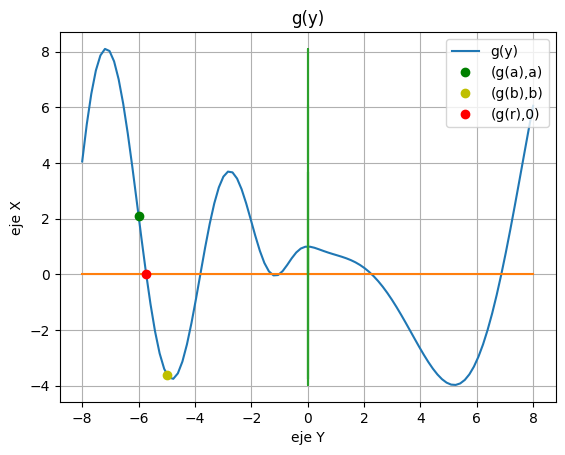

In [ ]:
#@title representacion grafica del desarrollo: coordenadas representadas como (y,x)
y=np.linspace(-8,8,100)
x=g(y)
plt.plot(y,x, label='g(y)')
plt.plot(y,[0]*len(x))
plt.plot([0]*len(x),x)

plt.plot(a, g(a), 'go', label='(g(a),a)') #punto a
plt.plot(b, g(b), 'yo', label='(g(b),b)') #punto b
plt.plot(bisection(g, a, b, tol=10e-5), 0, 'ro', label='(g(r),0)') #punto (g(r),0) ,es decir, una raiz entre a y b
plt.title('g(y)')
plt.grid(True)

plt.ylabel('eje X')
plt.xlabel('eje Y')
plt.legend()

plt.show()

Podemos probar un intervalo [a,b] no unitario, basandonos en la cantidad de iteraciones, recordando que:

* $error<\frac{b-a}{2^{n+1}}$ implica $n+2$ evaluaciones.
* la solución es correcta en $p$ decimales si $error<\frac{10^{-p}}{2}$

Por lo tanto para garantizar $p$ decimales con un intervalo $[a,b]$ determinado buscamos la cantidad de iteraciones necesarias resolviendo la siguiente ecuación:

$\frac{10^{-p}}{2}>\frac{b-a}{2^{n+1}}$

Si consideramos $9$ decimales en un intervalo unitario tenemos que:

$\frac{10^{-9}}{2}>\frac{1}{2^{n+1}}$

$10^{9}<2^{n}$

$9\cdot log_{2}(10)<n$

**IMPORTANTE: este logaritmo es en base 2**

Notar tambien que esto es una cota superior, es decir, el algoritmo puede converger antes de dicha cantidad de iteraciones. Dicho de otro modo, con esto se garantiza de que en n+2 iteraciones si o si se tendran AL MENOS p decimales de presicion.

en el intervalo [-6,-5] la raiz es: -5.7284136416062

In [ ]:
#@title n
print(f'n = {9*np.log2(10)}')

n = 29.89735285398626


In [ ]:
#@title biseccion con iteraciones
def bisection(f, a, b, iterations):
  iter=0
  while iter < iterations:
    c=(a+b)/2.0
    iter+=1
    if f(c)==0:
      break
    if f(a)*f(c)<0.:
      b=c
    else:
      a=c

  return ((a+b)/2),a,b

In [ ]:
#@title calculo para diferentes p
import math

a,b=interval_finder(initial_guess=-6, step=10e-3, stop=10, f=g)#se recuperan a y b mas que nada por si se modifico el codigo previo

for p in np.arange(20):
  n=p*np.log2(10)

  r,A,B=bisection(g, a, b, iterations=math.ceil(n))
  print(f'p={p} | n={n} | r={r}')


p=0 | n=0.0 | r=-5.625
p=1 | n=3.321928094887362 | r=-5.7265625
p=2 | n=6.643856189774724 | r=-5.7275390625
p=3 | n=9.965784284662087 | r=-5.7283935546875
p=4 | n=13.287712379549449 | r=-5.728416442871094
p=5 | n=16.609640474436812 | r=-5.7284135818481445
p=6 | n=19.931568569324174 | r=-5.728414177894592
p=7 | n=23.253496664211536 | r=-5.728414110839367
p=8 | n=26.575424759098897 | r=-5.728414104320109
p=9 | n=29.89735285398626 | r=-5.728414103738032
p=10 | n=33.219280948873624 | r=-5.728414103716204
p=11 | n=36.541209043760986 | r=-5.728414103722571
p=12 | n=39.86313713864835 | r=-5.72841410372223
p=13 | n=43.18506523353571 | r=-5.7284141037222795
p=14 | n=46.50699332842307 | r=-5.72841410372228
p=15 | n=49.82892142331043 | r=-5.728414103722281
p=16 | n=53.150849518197795 | r=-5.728414103722281
p=17 | n=56.47277761308516 | r=-5.728414103722281
p=18 | n=59.79470570797252 | r=-5.728414103722281
p=19 | n=63.11663380285988 | r=-5.728414103722281


In [ ]:
#@title prints de a y b post biseccion
import math
a=2
b=4
for p in np.arange(20):
  n=p*np.log2(10)

  r,A,B=bisection(g, a, b, iterations=math.ceil(n)+2)
  print(f'a={A} b={B}')

a=2 b=2.5
a=2.25 b=2.28125
a=2.2734375 b=2.27734375
a=2.2763671875 b=2.27685546875
a=2.2764892578125 b=2.276519775390625
a=2.276500701904297 b=2.2765045166015625
a=2.276503562927246 b=2.2765040397644043
a=2.276503771543503 b=2.276503801345825
a=2.2765037901699543 b=2.2765037938952446
a=2.2765037934295833 b=2.2765037938952446
a=2.2765037935459986 b=2.2765037935751025
a=2.2765037935496366 b=2.2765037935532746
a=2.27650379355282 b=2.2765037935532746
a=2.276503793552905 b=2.2765037935529335
a=2.276503793552912 b=2.2765037935529158
a=2.2765037935529135 b=2.276503793552914
a=2.2765037935529135 b=2.276503793552914
a=2.2765037935529135 b=2.276503793552914
a=2.2765037935529135 b=2.276503793552914
a=2.2765037935529135 b=2.276503793552914


In [ ]:
#@title calculo de la ultima iteracion del algoritmo
print(f'a={A}')
print(f'b={B}')
print(f'(a+b)/2={(A+B)/2}')

a=-5.728414103722281
b=-5.72841410372228
(a+b)/2=-5.728414103722281


QUE PASÓ??????????